In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.enable_eager_execution()

In [2]:
import numpy as np

In [3]:
X_data = np.random.random((10000,2))
print(X_data)

[[0.83218643 0.77541067]
 [0.76997511 0.46876785]
 [0.96581968 0.67825979]
 ...
 [0.63124273 0.28513545]
 [0.923342   0.0386201 ]
 [0.99234342 0.56205141]]


In [4]:
sample_weights = np.array([[3,4]])

In [5]:
y_data = np.matmul(X_data, sample_weights.transpose())
print(y_data)
print(y_data.shape)

[[5.59820198]
 [4.18499676]
 [5.61049823]
 ...
 [3.03426999]
 [2.9245064 ]
 [5.22523591]]
(10000, 1)


In [6]:
# Add noise to data
y_data = np.add(y_data, np.random.uniform(-0.5,0.5))

In [7]:
y_data

array([[5.51015245],
       [4.09694723],
       [5.5224487 ],
       ...,
       [2.94622046],
       [2.83645687],
       [5.13718638]])

In [8]:
# split data to traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [9]:
# X_train shape
print(X_train.shape)

(8000, 2)


In [10]:
# y_train shape
print(y_train.shape)

(8000, 1)


In [11]:
tfe = tf.contrib.eager


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [12]:
# khai bao bien

W = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.2,0.2))

In [13]:
# Linear Regression
def linear_regression(inputs):
    return tf.matmul(inputs, W, transpose_b=True)

In [14]:
# Loss function mean square error
def loss_function(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) - labels))

In [15]:
# Parameter
learning_rate = 0.002
num_steps = 10000

In [16]:
# Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)

# Caculate gradient
grad = tfe.implicit_gradients(loss_function)

In [17]:
# Training model
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, np.float32(X_train), np.float32(y_train)))
    
    if step % 100 == 0:
        train_loss = loss_function(linear_regression,np.float32(X_train), np.float32(y_train))
        test_loss = loss_function(linear_regression,np.float32(X_test), np.float32(y_test))
        print("Step {} train loss = {} test lost = {}".format(step,train_loss,test_loss))

Instructions for updating:
Colocations handled automatically by placer.
Step 0 train loss = 6.711505889892578 test lost = 6.851039886474609
Step 100 train loss = 4.258688449859619 test lost = 4.349401473999023
Step 200 train loss = 2.706514835357666 test lost = 2.7658002376556396
Step 300 train loss = 1.7240228652954102 test lost = 1.7630056142807007
Step 400 train loss = 1.1018844842910767 test lost = 1.1276962757110596
Step 500 train loss = 0.7077040076255798 test lost = 0.7249278426170349
Step 600 train loss = 0.45774394273757935 test lost = 0.46933576464653015
Step 700 train loss = 0.2990405261516571 test lost = 0.30691394209861755
Step 800 train loss = 0.19809143245220184 test lost = 0.2034910023212433
Step 900 train loss = 0.1337074339389801 test lost = 0.13744698464870453
Step 1000 train loss = 0.09248220175504684 test lost = 0.09509721398353577
Step 1100 train loss = 0.06593621522188187 test lost = 0.0677814781665802
Step 1200 train loss = 0.04870377108454704 test lost = 0.0500

In [18]:
W.numpy()

array([[2.9429798, 3.904418 ]], dtype=float32)

In [19]:
b.numpy()

-0.077955596

In [20]:
y_pred = linear_regression(np.float32(X_test))

In [21]:
y_pred

<tf.Tensor: id=221822, shape=(2000, 1), dtype=float32, numpy=
array([[4.163293 ],
       [2.6663632],
       [5.3036027],
       ...,
       [2.3200119],
       [3.9852767],
       [2.8799388]], dtype=float32)>

In [22]:
y_test

array([[4.17439516],
       [2.63843097],
       [5.33083517],
       ...,
       [2.27929094],
       [3.9907316 ],
       [2.86214506]])

In [23]:
import matplotlib.pyplot as plt

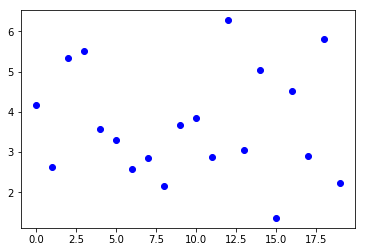

In [24]:
plt.plot(range(len(y_test[:20])), y_test[:20], 'bo')

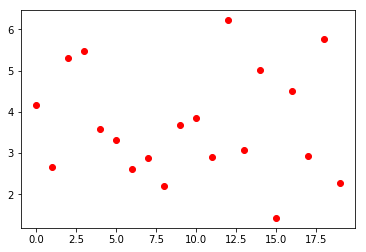

In [26]:
plt.plot(range(len(y_pred.numpy()[:20])), y_pred.numpy()[:20], 'ro')